<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/1SepPerceptronIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron

Aprendizaje supervisado

Conjunto iris

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Importamos el dataset para iniciar el análisis
from sklearn import datasets

iris = datasets.load_iris()


In [ ]:
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.
y = np.array(iris

In [ ]:
x1 = np.linspace(4,7.5,2)
x2 = (ppn.w_[0] + ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1,x2,'g',label= 'Borde de Decisión')
#Setosa
registros = y == -1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1,x2,c='r',marker='o',label='setosa')
#Versicolor
registros = y == 1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1,x2,c='r',marker='x',label='versicolor')

In [ ]:
#Funcion para graficar
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions (X,y,classifier,resolution=0.02):
  colors = np.array(['lime','red','blue','green'])
  cmap = ListedColormap(colors[:len(np.unique(y))])
#Superficies de decision
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
#vamos a hacerlo 1 dimensional para que el classidicador lo reciba con meshgrid
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                      np.arange(x2_min,x2_max,resolution))
#tenemos que transponer para que queden en orden
Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
#Conjuntos de cada clase
plt.scatter(X[:,0],X[:,1],alpha=0.9,c=colors[y],edgecolor='black')


In [ ]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal-len[cm]')
plt.ylabel('petal-len[cm]')
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=ppn,legend=2)
plt.xlabel('sepal-len[cm]')
plt.ylabel('petal-len[cm]')
plt.title('Per eptron en Iris')
plt.show()

Con skitlearn

Vamos a calcular el plano que mejor separe las clases con el perceptron

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris
# nos da sus datos, es un diccionario

In [ ]:
X = iris.data[:,[2,3]]
y = iris.target[:]
print('Etiquetas: ',np.unique(y))

Etiquetas:  [0 1 2]


In [ ]:
#Conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y, random_state=1) #quremos que tome en cuenta la estratificación

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [ ]:
print('Total de etiquetas en y = ', np.bincount(y))
print('Total de etiquetas en y_train = ', np.bincount(y_train))
print('Total de etiquetas en y_test = ', np.bincount(y_test))

Total de etiquetas en y =  [50 50 50]
Total de etiquetas en y_train =  [35 35 35]
Total de etiquetas en y_test =  [15 15 15]


In [ ]:
#Escalamiento
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Perceptron de sklearn
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Errores de clasificación : ',(y_test-y_pred).sum())

Errores de clasificación :  41


In [ ]:
#da todos los tipos: setosa, versocolor,
ppn.coef_

array([[-0.11, -0.15],
       [ 0.6 , -1.32],
       [ 0.52,  2.42]])

In [ ]:
#
print('Exactitud : ',ppn.score(X_test_std,y_test))

Exactitud :  0.37777777777777777


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Exactitud : ',accuracy_score(y_test,y_pred))

Exactitud :  0.37777777777777777


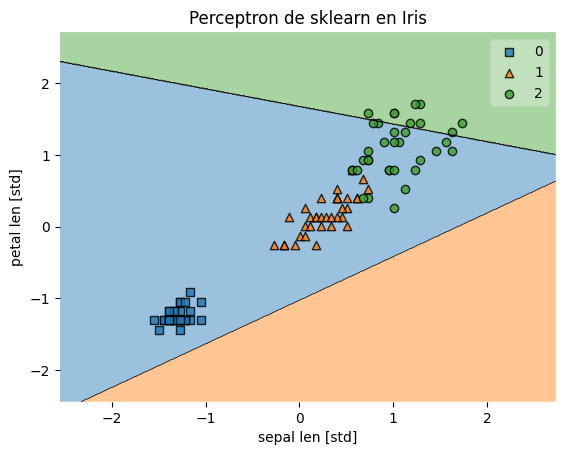

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train_std,y_train,clf=ppn)
plt.xlabel('sepal len [std]')
plt.ylabel('petal len [std]')
plt.title('Perceptron de sklearn en Iris')
plt.show()

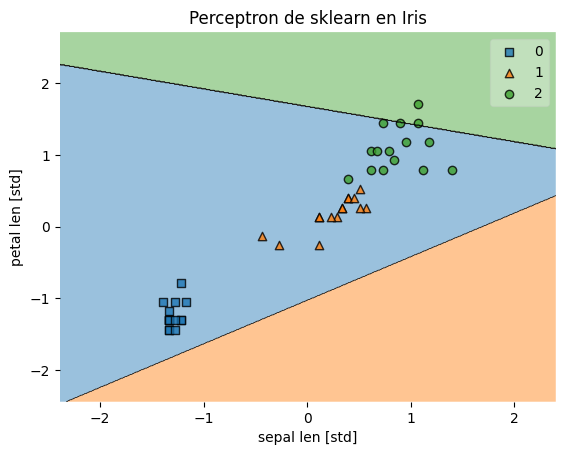

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_test_std,y_test,clf=ppn)
plt.xlabel('sepal len [std]')
plt.ylabel('petal len [std]')
plt.title('Perceptron de sklearn en Iris')
plt.show()